In [77]:
#imports
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.linear_model import PassiveAggressiveClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix , plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import pickle

<AxesSubplot:>

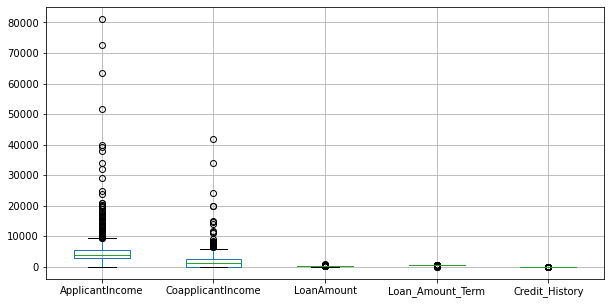

In [78]:
#daset
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')
df=pd.concat([df_train,df_test]) 
#recherche de outliers
df.boxplot(figsize=(10,5))

In [79]:
#missing values
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [80]:
#remplacement des missing values de LoanAmount par la moyenne car il n'ya pas de outliers
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mean(),inplace=True)
#Loan status etant qualitatif remplacons les MV par le mode
df['Loan_Status'].fillna("Y",inplace=True)
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     20
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [81]:
#types de data
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [82]:
#moy de chaque colonne
df.mean()

ApplicantIncome      5179.795107
CoapplicantIncome    1601.916330
LoanAmount            142.511530
Loan_Amount_Term      342.201873
Credit_History          0.835920
dtype: float64

In [83]:
#construction et entrainement du modele
model=LogisticRegression(random_state=0)
X=df.iloc[:,[8,10]].values
y=df.Loan_Status.values
score=0
while score<0.88:
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    score=accuracy_score(y_test,y_pred) 
    print(score)



0.8170731707317073
0.7804878048780488
0.7926829268292683
0.7967479674796748
0.8089430894308943
0.8373983739837398
0.8008130081300813
0.7886178861788617
0.7601626016260162
0.8252032520325203
0.8373983739837398
0.7926829268292683
0.8170731707317073
0.7764227642276422
0.8008130081300813
0.8252032520325203
0.8170731707317073
0.7926829268292683
0.8089430894308943
0.8089430894308943
0.7886178861788617
0.8292682926829268
0.7967479674796748
0.8170731707317073
0.8089430894308943
0.8089430894308943
0.7886178861788617
0.7723577235772358
0.8048780487804879
0.7845528455284553
0.8048780487804879
0.7845528455284553
0.8008130081300813
0.8089430894308943
0.7764227642276422
0.8130081300813008
0.7682926829268293
0.8130081300813008
0.8008130081300813
0.8455284552845529
0.8048780487804879
0.7804878048780488
0.8048780487804879
0.8252032520325203
0.8414634146341463
0.8211382113821138
0.7926829268292683
0.8373983739837398
0.8089430894308943
0.8008130081300813
0.8455284552845529
0.8130081300813008
0.8130081300

In [84]:
#nous avons pu ameliorer le score
score=accuracy_score(y_test,y_pred) 
print(f'Accuracy: {round(score*100,2)}%') 


Accuracy: 88.21%


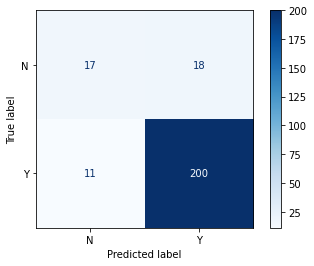

In [85]:
# confusion matrix 
plot_confusion_matrix(model,X_test,y_test,cmap=plt.cm.Blues)


In [86]:
#enregistrement du model
with open('Loan_classifier.pkl', 'wb') as f:
    pickle.dump(model, f)
    


In [87]:
#un petit test
print(model.predict([[100,200]]))

['Y']
